# Shopping Apps, Rating for Google Play Store and Apple AppStore Users

<img src="https://image.freepik.com/free-vector/cartoon-delivery-man-brings-goods-customer-from-laptop-vector-illustration-concept-with-online-shopping-services_46527-344.jpg" />

## Introduction

Users download apps for various purposes. Given that there is a rise in the usage of online shopping due to the Covid-19 pandemic, improvement of shopping experience has become more important then before. With that in mind, what are the important features we have to look out for to improve a shopping app?

## Problem Statement

- How do the app ratings differ across different shopping apps?
- Is there any specific group of users we can look out for to improve the app?
- Are there any specific improvement we can work on to further improve user experience of the app?

To explore and answer the above questions, we will scrap reviews from Google Play Store and Apple AppStore and conduct analysis and modelling.

## Executive Summary

The data is webscrapped from the Shopping category in Google Play Store and Apple Appstore, 8 apps reviews were chosen for this project (Amazon, Wish, ASOS, Lazada, Ebay, Shoppee, AliExpress, Carousell). The data used was exclusive dated in 2020 only as majority of the data scrapped are from in 2020. Data cleaning was done by removing stopwords, lemmatized and Vectorized to the raw data to create bag-of-words. 

There will be 3 steps to our modelling process, with the first step classifying whether the text is a good or bad review, followed by classifying the reviews into categories created through topic modelling to group them into different subgroups.

A few classification model were used, namely LogisticRegression, MultinomialNB, SGDClassifier, RandomForest, ADABoost. LogisticRegression give us the best results in classifying our data and thus used as the final model. 

As the data set is quite big, RandomizedSearch was used instead of Gridsearch to find the best hyperparameter.



### Content Summary
- Webscrapped reviews of 8 apps from Google Play Store & Apple App Store
- Data Cleaning 
  - Removing data not in year 2020
  - Removing emoji and punctuations
  - Removing non english words
  - Lemmatization
  - Compound score calculation using VaderSentiment
- EDA
  - Plotting distribution of features
  - Topic modelling of good reviews
  - Topic modelling of bad reviews
- Machine Learning Model 
  - LogisticRegression
  - MultinomialNB
  - SGDClassifier
  - RandomForest
  - ADABoost
- Deep Learning Model
  - Convolutional Neural Network
  
### Key Findings
- Most complains are on Bad User Experience, while most good reviews are on the good overall service of the App, which is rather vague
- There is more negative reviews in 9am - 3pm period, and on Tuesdays
- There is quite a number of reviews being 1 word, or otherwise rated wrongly by the user, (e.g. review: Excellent, Rating: 1)
- The multiclass model seems to be predicting better compared to what the topic modeling originally set the topic was, which is quite interesting as the model is able to differentiate the categories clearly base on the keywords.

### Metrics
Using the following metrics to evaluate the models:
- ROC AUC curve(for Binary Classification)
  -  The ROC AUC cruve is able to tell how much model is capable of distinguishing between classes.ranging from 0 to 1, with 1 being perfectly classified.
- MCC Score
  - The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.
- Kappa Score(For multiclassification)
  - Cohen’s Kappa is a quantitative measure of reliability for two raters that are rating the same thing, corrected for how often that the raters may agree by chance. ranging from 0 to 1, with 1 being good.
  
- f1 score weighted
  - The F1 Scores are calculated for each label and then their average is weighted by support - which is the number of true instances for each label. It can result in an F-score that is not between precision and recall

### Final Results
**Classification (Good & Bad Reviews)**
- LogisticRegression
  - Train data AUC: 0.947
  - Test data AUC: 0.945
  - MCC Score: 0.729
  
  
**Multi Classification (Bad Review categories)**
- LogisticRegression
    - Train Data f1 weighted score: 0.867	
    - Test Data f1 weighted score: 0.862	
    - MCC Score: 0.798336	
    - Kappa Score: 0.796888


**Multi Classification (Good Review categories)**
- LogisticRegression
    - Train Data f1 weighted score: 0.937	
    - Test Data f1 weighted score: 0.944	
    - MCC Score: 0.907	
    - Kappa Score: 0.906

### Limitations
- The data set is mostly collected in the month of August and September, which means the model is able to predict this period better, but not in predicting past data. 
- More data could be collected, as there is a major lack of Apple Appstore reviews compared to Google Play Store

### Further research
- Try to use Compound score gathered from VaderSentiment to do the classification instead, as we know there is some misclassified post by users. which hopefully give us a better accuracy.

### Content
1. Webscrap data
2. Data Cleaning
3. EDA
4. Model Part 1, Classification (Good & Bad Reviews)
5. Model Part 2, Multi Classification (Bad Review categories) 
6. Model Part 3, Multi Classification (Good Review categories)
7. Deep Learning Model

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('pastel')
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
from ipywidgets import widgets

#setting cufflinks to link iplot() method to df
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


from time import time

from PIL import Image
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import re
import spacy
from spacymoji import Emoji
from nltk.corpus import stopwords, words
from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer as lemmatize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import sys
from pprint import pprint

# Gensim
import gensim, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

import pyLDAvis.gensim

from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer, CorpusFromParsedDocuments, Scalers
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
df = pd.read_csv('../data/cleaned_reviews.csv')

In [3]:
df.head()

rating                 date      app   store  \
0       5  2020-09-16 20:26:28  shoppee  google   
1       4  2020-09-16 20:13:46  shoppee  google   
2       5  2020-09-16 20:13:05  shoppee  google   
3       4  2020-09-16 20:11:18  shoppee  google   
4       5  2020-09-16 20:08:54  shoppee  google   

                                              review  \
0    Orders mostly came early and products are good.   
1                                Good and convenient   
2                                      Gd...........   
3  My first purchase experience...Happy with purc...   
4                A lot of items at a very good deal.   

                        clean_content               adj  \
0       order come early product good             good    
1                     good convenient  good convenient    
2                                 NaN               NaN   
3  purchase experience happy purchase      first happy    
4                  lot item good deal             good    

                            noun   verb emoji  neg_score  neu_score  \
0                 order product   come    NaN        0.0      0.707   
1                            NaN    NaN   NaN        0.0      0.408   
2                            NaN    NaN   NaN        0.0      1.000   
3  purchase experience purchase     NaN   NaN        0.0      0.714   
4                 lot item deal     NaN   NaN        0.0      0.715   

   pos_score  compound_score  
0      0.293          0.4404  
1      0.592          0.4404  
2      0.000          0.0000  
3      0.286          0.3400  
4      0.285          0.4927

In [4]:
df.shape

(78934, 14)

# Removing null values

In [5]:
df.isna().sum()[df.isna().sum() != 0]

review               5
clean_content     4249
adj              18158
noun             25522
verb             35821
emoji            73156
dtype: int64

In [6]:
df= df[df['clean_content'].notna()]
df.reset_index(inplace = True, drop = True)

In [7]:
df.isna().sum()[df.isna().sum() != 0]

adj      14433
noun     22056
verb     31922
emoji    69984
dtype: int64

In [8]:
print(f'Number of rows entry in data: {df.shape[0]}')

Number of rows entry in data: 74685


In [9]:
df.notna().sum()[df.notna().sum() != df.shape[0]]

adj      60252
noun     52629
verb     42763
emoji     4701
dtype: int64

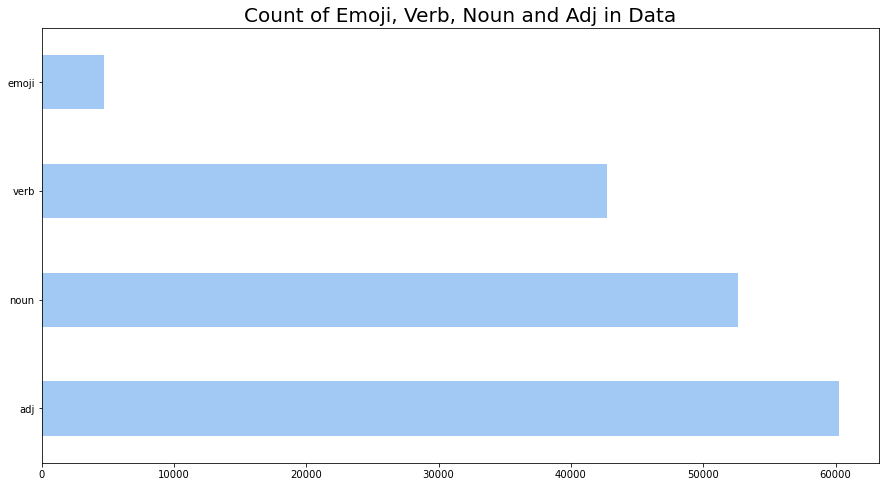

In [10]:
plt.figure(figsize = (15, 8))
plt.title('Count of Emoji, Verb, Noun and Adj in Data', fontsize = 20)
df.notna().sum()[df.notna().sum() != df.shape[0]].plot(kind = 'barh');

**Remarks**
- There is very little reviews that uses Emoji, which means we cannot rely heavily on emojis to do the prediction.

## Changing Date Data to datetime dtype

In [11]:
df['date'] = df['date'].astype('datetime64')

## Creating new columns for eda

### New time columns

In [12]:
df['month'] = df.date.dt.month
df['dayofweek'] = df.date.dt.dayofweek + 1 #adding 1 as the data starts from 0 for monday, this is to avoid confusion
df['hour'] = df.date.dt.hour
df['minute'] = df.date.dt.minute

### Length of text columns

In [13]:
df['text_len'] = df['review'].str.len()
df['word_count'] = df['review'].str.split().str.len()

# EDA

## Distribution of App, Rating, Store, Month and DayofWeek

In [14]:
def plot_countplots(df, features):
    nrows = int(np.ceil(len(features)/2))
    fig, ax = plt.subplots(nrows, 2, figsize=(18,6*nrows))
    ax = ax.ravel()
    for i in range(len(features)):
        ax[i].set_title(f'Count of {features[i]} across Shopping reviews', fontdict = {'fontsize': 10})
        sns.countplot(x = features[i], data = df, ax = ax[i]);

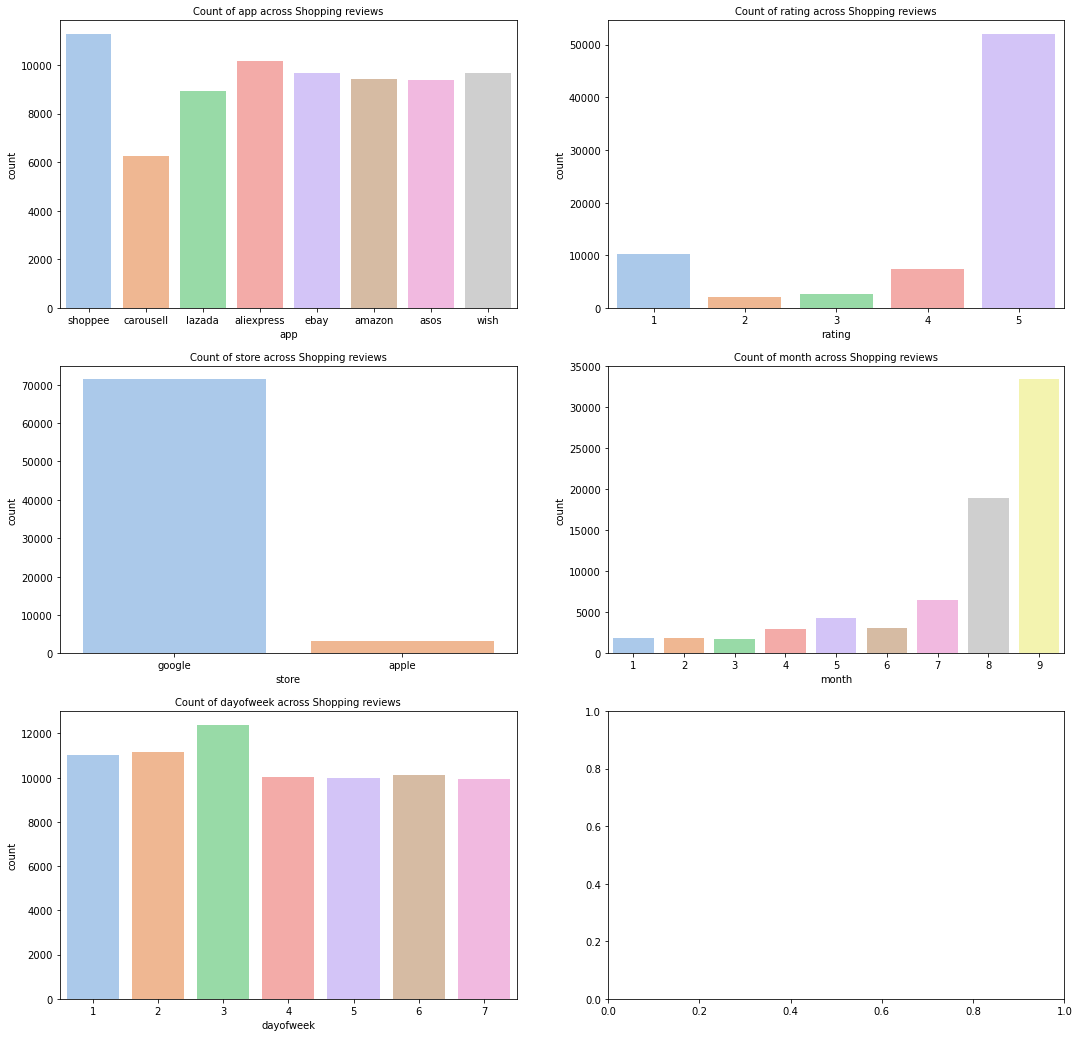

In [15]:
plot_countplots(df, ['app', 'rating', 'store', 'month', 'dayofweek'])

**Remarks**
- There is a imbalance data in the ratings, with significantly more positive reviews as compared to negative reviews
- There is more reviews data in the September month as compared to the earlier period, which is due to the data collection period
- Interestingly, there is more reviews on Wednesday as compared to other days

## Boxplot of App across Month

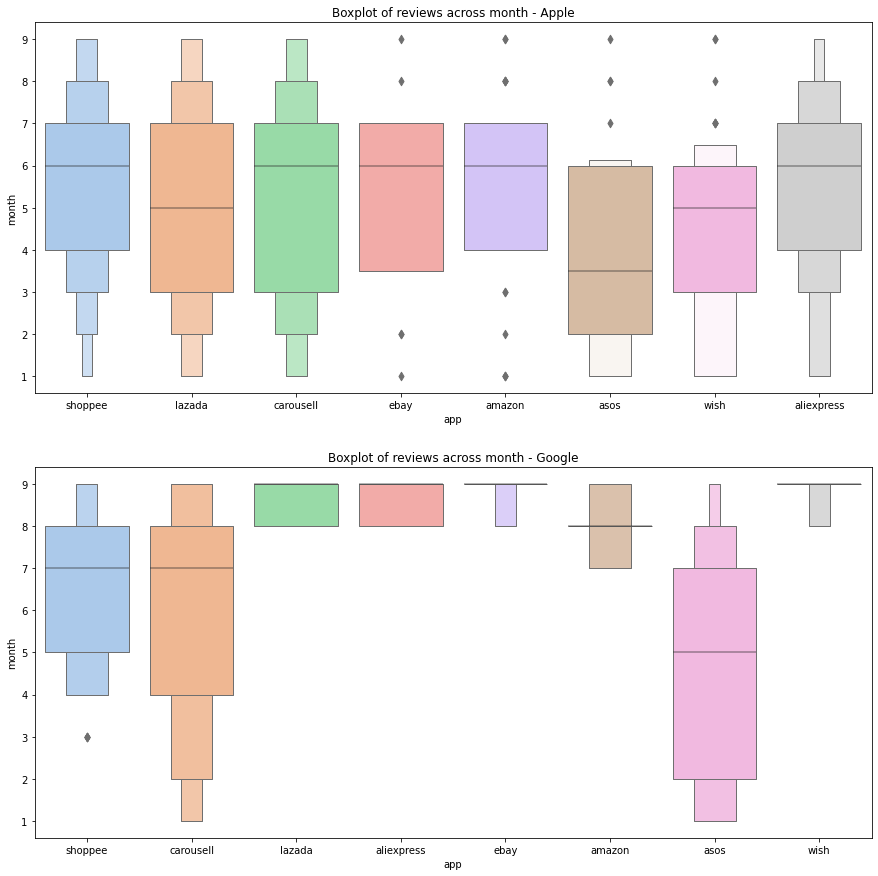

In [16]:
fig,ax = plt.subplots(2,1, figsize = (15, 15))
ax[0].set_title('Boxplot of reviews across month - Apple')
sns.boxenplot(x = 'app', y = 'month', data = df[df['store'] == 'apple'], ax = ax[0])

ax[1].set_title('Boxplot of reviews across month - Google')
sns.boxenplot(x = 'app', y = 'month', data = df[df['store'] == 'google'], ax = ax[1]);

**Remarks**
- The data collected is more spread across the time period in Apple Appstore as compared to Google Playstore

## TimeSeries Analysis of Data

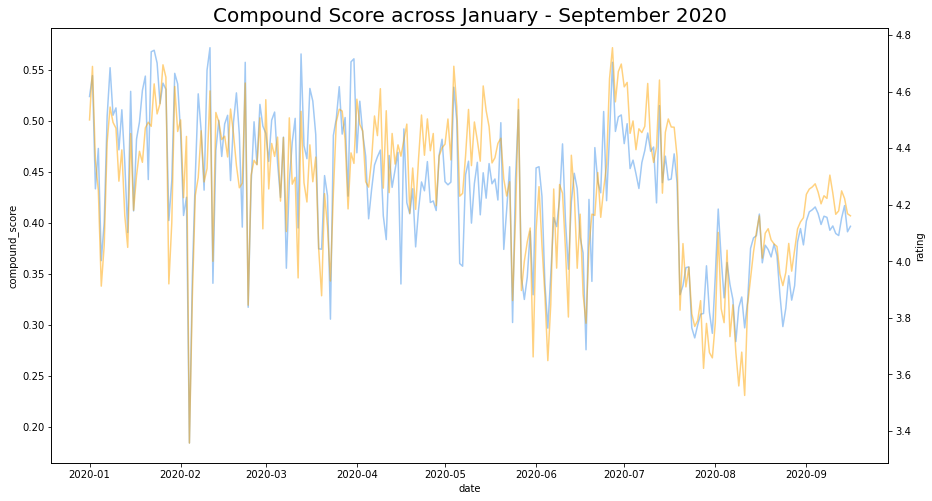

In [17]:
plt.figure(figsize = (15,8))
plt.title('Compound Score across January - September 2020', fontsize = 20)
ax = sns.lineplot(x = 'date' , y = 'compound_score', data = df.resample('D', on = 'date').mean())
g2 = ax.twinx()
sns.lineplot(x = 'date' , y = 'rating', data = df.resample('D', on = 'date').mean(), ax = g2, color = 'orange', alpha = 0.5);

**Remarks**
- The compound score from VaderSentiment and ratings are closely similar, therefore will use compound score for certain visualisation

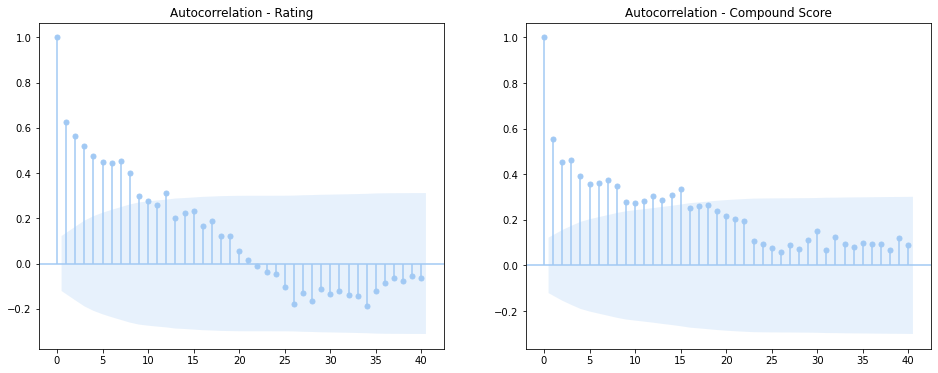

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
plot_acf(df.resample('D', on = 'date').mean()['rating'], lags = 40, ax = ax[0], title = 'Autocorrelation - Rating')
plot_acf(df.resample('D', on = 'date').mean()['compound_score'], lags = 40, ax = ax[1], title = 'Autocorrelation - Compound Score');

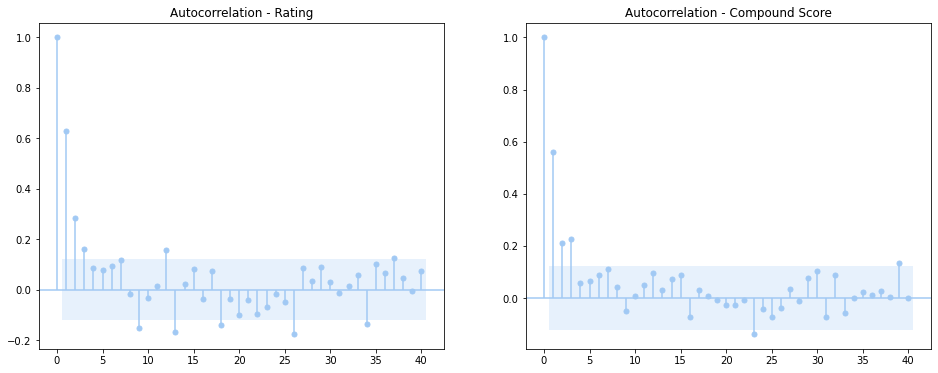

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
plot_pacf(df.resample('D', on = 'date').mean()['rating'], lags = 40, ax = ax[0], title = 'Autocorrelation - Rating')
plot_pacf(df.resample('D', on = 'date').mean()['compound_score'], lags = 40, ax = ax[1], title = 'Autocorrelation - Compound Score');

**Remarks**
- from the plots above, it can be interpreted that there is a seasonality of 1 week(7days), and around 1 month(26, 28 days)

## Distribution by Hour, DayofWeek

In [20]:
def plot_countplots_time(df, date_features, scoring):
    nrows = int(np.ceil(len(date_features)))
    fig,ax = plt.subplots(nrows,1, figsize = (15, 6*nrows))
    
    for i in range(len(date_features)):
        ax[i].set_title(f'Count of {date_features[i]} across Shopping reviews {scoring}', fontdict = {'fontsize': 20})
        g = sns.countplot(x = date_features[i] , data = df, ax=ax[i])
        g2 = g.twinx()
        
        g2 = sns.pointplot(x = date_features[i],
                           y = scoring, 
                           data = df ,
                           ax=g2, color = 'black')
        
        plt.legend(labels = [f'{scoring} mean'])
    plt.show()

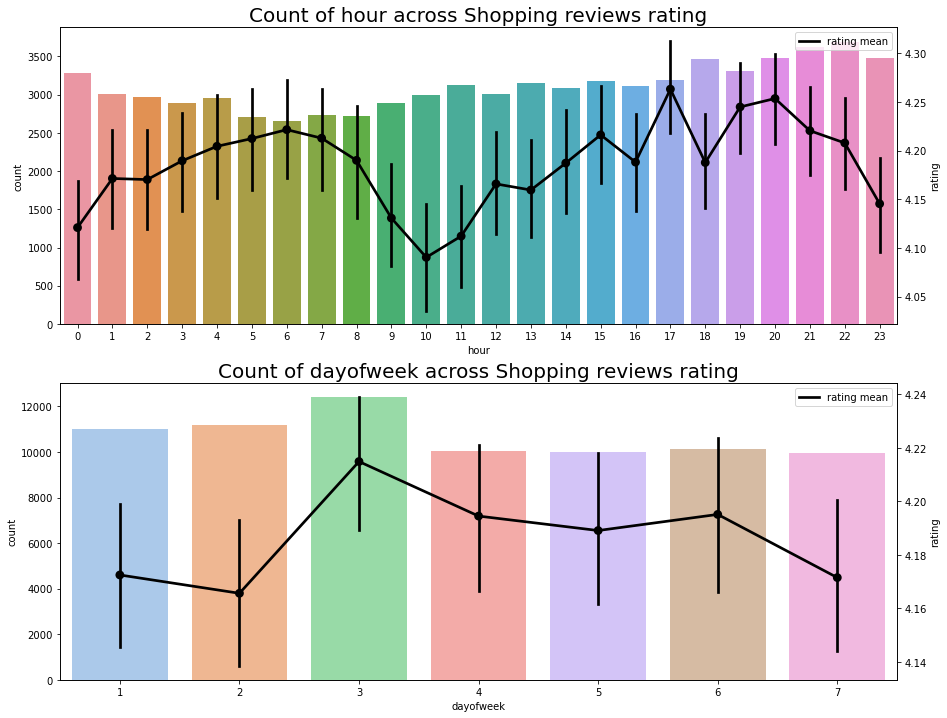

In [21]:
plot_countplots_time(df, ['hour', 'dayofweek'], 'rating')

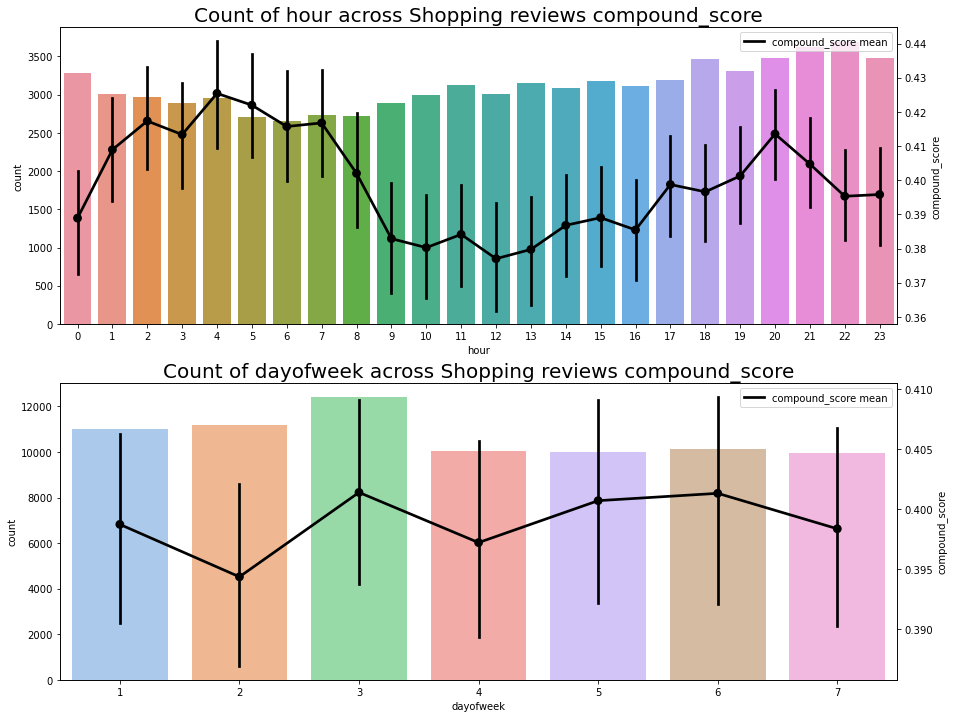

In [22]:
plot_countplots_time(df, ['hour', 'dayofweek'], 'compound_score')

**Remarks**
- More negative reviews are seen in 9am - 3pm period
- More negative reviews in Tuesdays

## Distribution of Wordlen, Wordcount

In [23]:
def dist_plotting(features):
    nrows = len(features)
    fig, ax = plt.subplots(nrows,1, figsize = (15, 6*nrows))
    plt.subplots_adjust(hspace = 0.2)
    
    for i in range(len(features)):
        ax[i].set_title(f'Distribution of {features[i]} of reviews')
        sns.histplot(data = df[df['rating'] > 3], x = features[i], color = 'b', ax = ax[i], label = 'good_review')
        sns.histplot(data = df[df['rating'] <= 3], x = features[i], alpha = 0.7, ax = ax[i], color = 'r', label = 'bad_review')
        ax[i].set_xlim([0,df[features[i]].quantile(q = 0.99)])
        ax[i].legend()

Average text length of good reviews: 51
Average text length of bad reviews: 160
Average word count of good reviews: 9
Average word count of bad reviews: 29


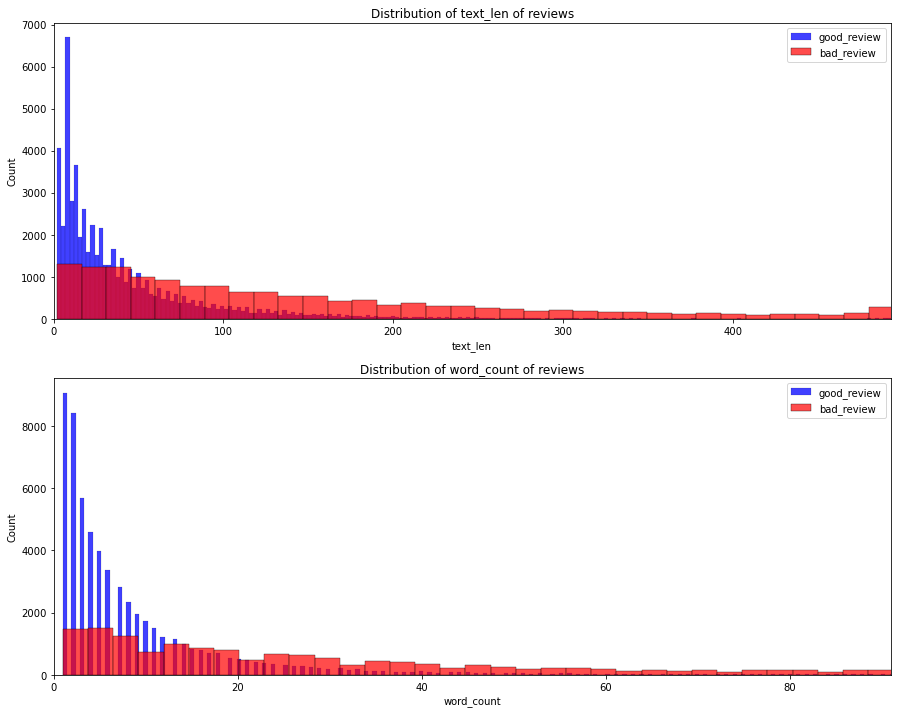

In [24]:
print(f'Average text length of good reviews: {round(df.text_len[df.rating > 3].mean())}')
print(f'Average text length of bad reviews: {round(df.text_len[df.rating <= 3].mean())}')
print(f'Average word count of good reviews: {round(df.word_count[df.rating > 3].mean())}')
print(f'Average word count of bad reviews: {round(df.word_count[df.rating <= 3].mean())}')

dist_plotting(['text_len', 'word_count'])

**Remarks**
- Bad reviews tend to have more word count as compared to good reviews

## Distribution of Adj, Noun, Verb and Emoji

In [25]:
def dist_plotting_word(features):
    nrows = len(features)
    fig, ax = plt.subplots(nrows,1, figsize = (15, 5*nrows))
    plt.subplots_adjust(hspace = 0.4)
    
    for i in range(len(features)):
        ax[i].set_title(f'Distribution of {features[i]} of reviews')
        sns.histplot(data = df[df['rating'] > 3], x = round(df[df['rating'] > 3][features[i]].str.len()), color = 'b', ax = ax[i], label = 'good_review')
        sns.histplot(data = df[df['rating'] <= 3], x = round(df[df['rating'] <= 3][features[i]].str.len()), alpha = 0.7, ax = ax[i], color = 'r', label = 'bad_review')
        ax[i].set_xlim([0,round(df[df['rating'] > 3][features[i]].str.len()).quantile(q = 0.99)])
        ax[i].legend()

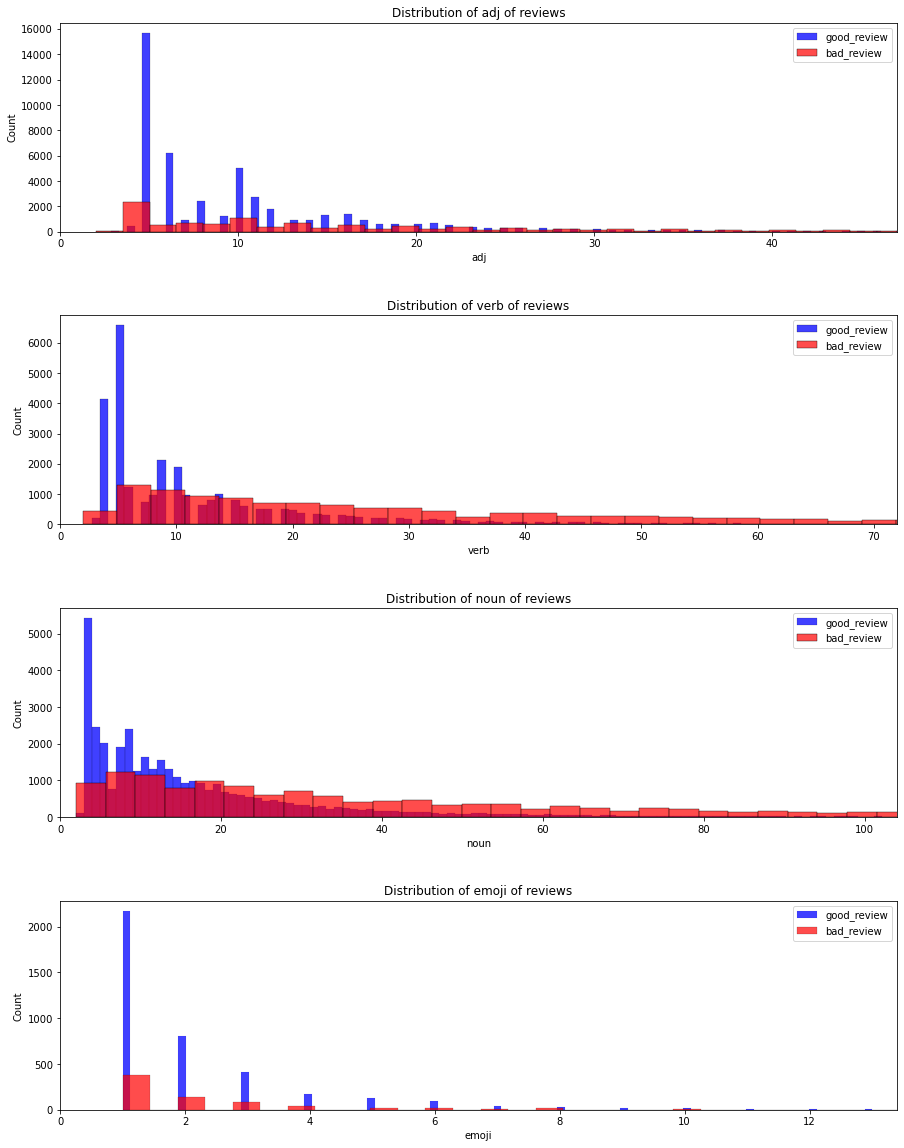

In [26]:
dist_plotting_word(['adj', 'verb', 'noun', 'emoji'])

## Boxplot of Rating across apps

In [27]:
def boxplot_interact(scoring):
    
    y0 = df.loc[df['app'] == 'shoppee'][scoring]
    y1 = df.loc[df['app'] == 'carousell'][scoring]
    y2 = df.loc[df['app'] == 'lazada'][scoring]
    y3 = df.loc[df['app'] == 'aliexpress'][scoring]
    y4 = df.loc[df['app'] == 'ebay'][scoring]
    y5 = df.loc[df['app'] == 'amazon'][scoring]
    y6 = df.loc[df['app'] == 'asos'][scoring]
    y7 = df.loc[df['app'] == 'wish'][scoring]
    
    trace0 = go.Box(y=y0,name = 'shoppee',marker = dict(color = 'rgb(214, 12, 140)',))
    trace1 = go.Box(y=y1,name = 'carousell',marker = dict(color = 'rgb(0, 128, 128)',))
    trace2 = go.Box(y=y2,name = 'lazada',marker = dict(color = 'rgb(10, 140, 208)',))
    trace3 = go.Box(y=y3,name = 'aliexpress',marker = dict(color = 'rgb(12, 102, 14)',))
    trace4 = go.Box(y=y4,name = 'ebay',marker = dict(color = 'rgb(10, 0, 100)',))
    trace5 = go.Box(y=y5,name = 'amazon', marker = dict(color = 'rgb(100, 0, 10)',))
    trace6 = go.Box(y=y6,name = 'asos',marker = dict(color = 'rgb(255, 212, 59)',))
    trace7 = go.Box(y=y7,name = 'wish',marker = dict(color = 'rgb(100, 100, 100)',))
    
    data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
    
    layout = go.Layout(title = f"Sentiment {scoring} Boxplot of app")
                    
    fig = go.Figure(data=data,layout=layout)
    fig.update_layout(autosize=False,width=1000,height=500,
                      margin=dict(l=50,r=50,b=100,t=100,pad=4),paper_bgcolor="white")
    
    iplot(fig, filename = f'Sentiment {scoring} Boxplot of app', image_width=600, image_height=400,)

In [28]:
boxplot_interact('rating')

## Boxplot of Compound score across apps

In [29]:
boxplot_interact('compound_score')

**Remarks**
- Amazon app seems to have quite a fair bit of ratings across 1-5, followed by Carousell, then Lazada.
- Shoppee and Ebay have more positive review by looking at the compound score

## Distribution of Keywords

In [30]:
def get_top_n_words(df, corpus, n=None):
    
    fig, ax = plt.subplots(1,len(corpus), figsize = (8*len(corpus), 6))
    plt.subplots_adjust(wspace = 0.4)
    
    for i in range(len(corpus)):
        vec = CountVectorizer().fit(df[corpus[i]])
        bag_of_words = vec.transform(df[corpus[i]])
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        
        count_df = pd.DataFrame(words_freq[:n], columns = ['review' , 'count'])
        ax[i].set_title(f'Top {n} keywords in {corpus[i]}',fontdict = {'fontsize': 20})
        sns.barplot(data = count_df, x = 'count', y = 'review', ax= ax[i])
        sns.despine(left = True, bottom = False, ax = ax[i]);

### Good Reviews

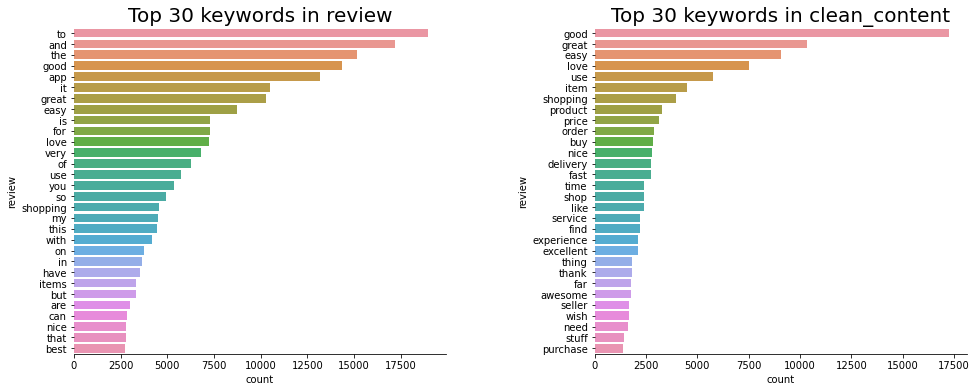

In [31]:
get_top_n_words(df[df['rating'] > 3], ['review', 'clean_content'], 30)

### Bad Reviews

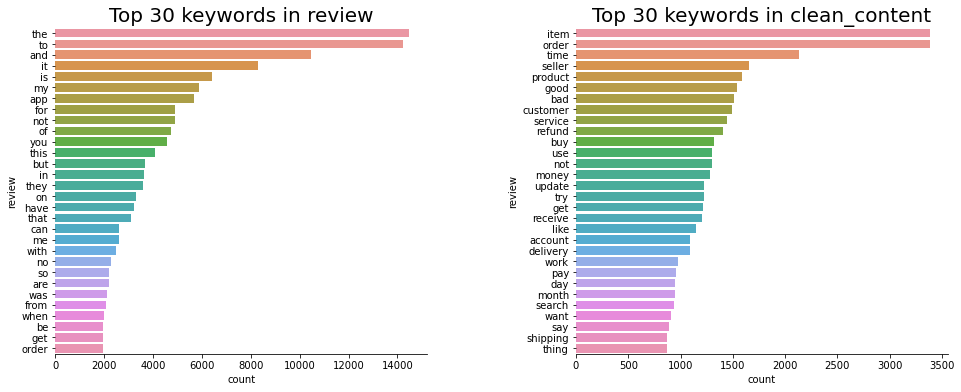

In [32]:
get_top_n_words(df[df['rating'] <= 3], ['review', 'clean_content'], 30)

**Remarks**
- Keywords in the top chart are good, great,easy, use
- keywords in the bad reviews top chart are time, order, service

## Distribution of Bigram Keywords

In [33]:
def get_top_n_bigrams(df, corpus, n=None):
    
    fig, ax = plt.subplots(1,len(corpus), figsize = (8*len(corpus), 6))
    plt.subplots_adjust(wspace = 0.4)
    
    for i in range(len(corpus)):
        vec = CountVectorizer(ngram_range=(2, 2)).fit(df[corpus[i]])
        bag_of_words = vec.transform(df[corpus[i]])
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        
        count_df = pd.DataFrame(words_freq[:n], columns = ['review' , 'count'])
        ax[i].set_title(f'Top {n} Bigrams keywords in {corpus[i]}',fontdict = {'fontsize': 20})
        sns.barplot(data = count_df, x = 'count', y = 'review', ax= ax[i])
        sns.despine(left = True, bottom = False, ax = ax[i]);

### Good Reviews

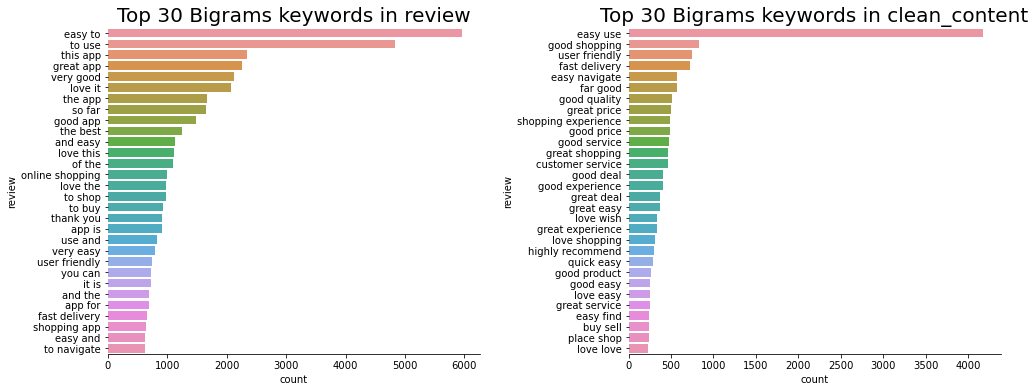

In [34]:
get_top_n_bigrams(df[df['rating'] > 3], ['review', 'clean_content'], 30)

### Bad Reviews

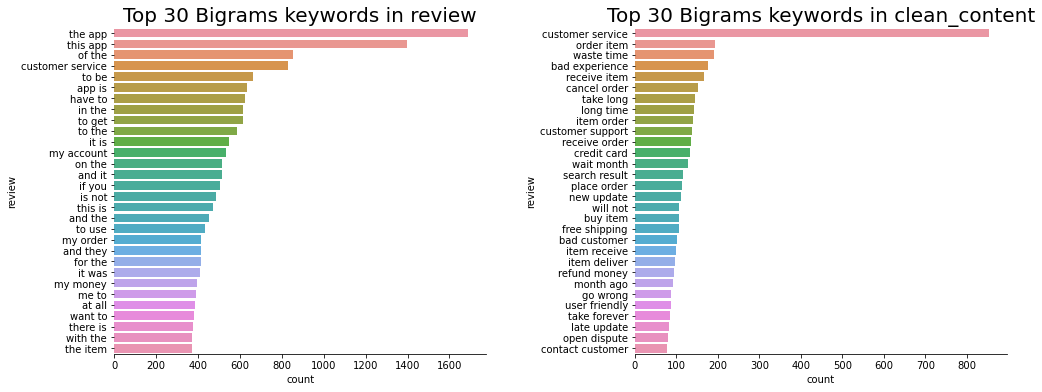

In [35]:
get_top_n_bigrams(df[df['rating'] <= 3], ['review', 'clean_content'], 30)

**Remarks**
- looking at the bigrams, Customer service seems to be very important factor in giving a bad review
- whereas 'Easy Use' came up as top for good review, which need further reasearch to see what it means

## Distribution of Trigram Keywords

In [36]:
def get_top_n_trigrams(df, corpus, n=None):
    
    fig, ax = plt.subplots(1,len(corpus), figsize = (8*len(corpus), 6))
    plt.subplots_adjust(wspace = 0.4)
    
    for i in range(len(corpus)):
        vec = CountVectorizer(ngram_range=(3, 3)).fit(df[corpus[i]])
        bag_of_words = vec.transform(df[corpus[i]])
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        
        count_df = pd.DataFrame(words_freq[:n], columns = ['review' , 'count'])
        ax[i].set_title(f'Top {n} Trigram keywords in {corpus[i]}',fontdict = {'fontsize': 20})
        sns.barplot(data = count_df, x = 'count', y = 'review', ax= ax[i])
        sns.despine(left = True, bottom = False, ax = ax[i]);

### Good Reviews

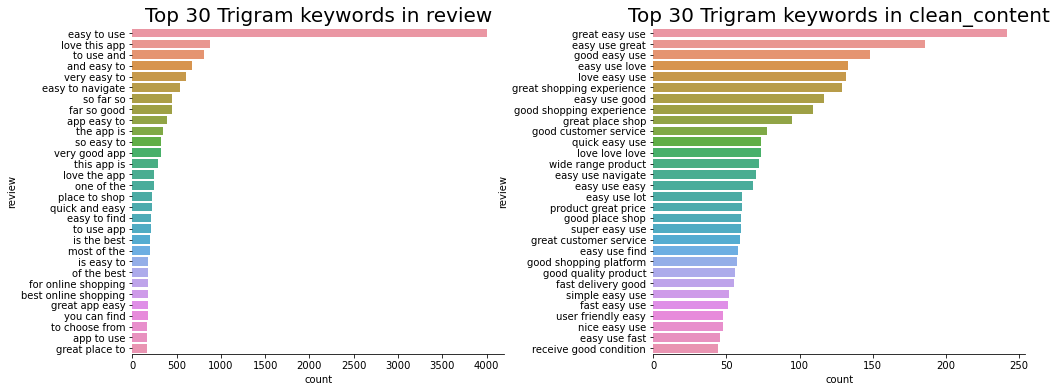

In [37]:
get_top_n_trigrams(df[df['rating'] > 3], ['review', 'clean_content'], 30)

### Bad Reviews

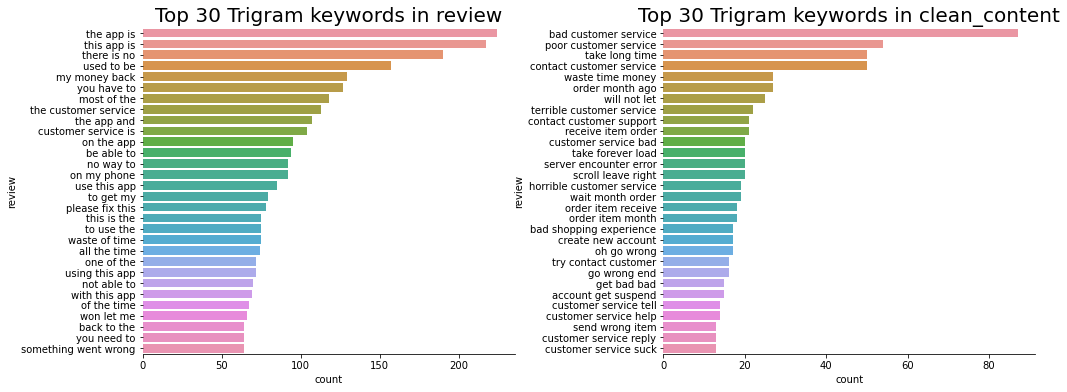

In [38]:
get_top_n_trigrams(df[df['rating'] <= 3], ['review', 'clean_content'], 30)

**Remarks**
- Similar to the bigrams plot, Customer Service and Easy use seems to be at the top 

## Extra: Interactive plot of ratings

In [39]:
month = widgets.IntSlider(value=1.0,min=1.0,max=9.0,step=1.0,
                          description='Month:',continuous_update=False)

use_date = widgets.Checkbox(description='Date: ',value=True,)

container = widgets.HBox(children=[use_date, month])

store = widgets.Dropdown(description='Store:   ',value='apple',
                         options=df['store'].unique().tolist())

app = widgets.Dropdown(options=list(df['app'].unique()),
                       value='shoppee',description='App:',)


goodrtrace = go.Histogram(x=df[df['rating'] > 3]['rating'], opacity=0.75, name='Good reviews')
badrtrace = go.Histogram(x=df[df['rating'] <= 3]['rating'], opacity=0.75, name='Bad reviews')
inter = go.FigureWidget(data=[goodrtrace, badrtrace],
                    layout=go.Layout(
                        title=dict(
                            text='Apps Ratings'
                        ),
                        barmode='overlay'
                    ))
inter.update_layout(autosize=False,width=1000,height=500,
                margin=dict(l=50,r=50, b=100,t=100,pad=4),
                paper_bgcolor="white",);

In [40]:
def validate():
    if app.value in df['app'].unique() and store.value in df['store'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(df['month'] == month.value, df['store'] == store.value,
                               df['app'] == app.value)]
            temp_df = df[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(df['store'] == 'apple', df['app'] == app.value)]
            temp_df = df[filter_list]
        x1 = temp_df[temp_df['rating'] > 3]['rating']
        x2 = temp_df[temp_df['rating'] <= 3]['rating']
        with inter.batch_update():
            inter.data[0].x = x1
            inter.data[1].x = x2
            inter.layout.barmode = 'overlay'
            inter.layout.xaxis.title = 'Ratings'
            inter.layout.yaxis.title = 'Number of Reviews'


app.observe(response, names="value")
store.observe(response, names="value")
month.observe(response, names="value")
use_date.observe(response, names="value")

In [41]:
container2 = widgets.HBox([app, store])
display(widgets.VBox([container,container2,inter]))

# Topic Modeling for above average ratings (4, 5 ratings )

## Converting to list

In [42]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df[df['rating'] > 3].clean_content.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['order', 'come', 'early', 'product', 'good']]


## LDA Modelling

In [43]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=42,
                                           chunksize = 1000,
                                           passes = 10,
                                           alpha = 'asymmetric')

pprint(lda_model.print_topics())

[(0,
  '0.150*"good" + 0.107*"great" + 0.086*"love" + 0.074*"easy" + 0.046*"use" + '
  '0.039*"shopping" + 0.027*"shop" + 0.021*"far" + 0.020*"experience" + '
  '0.019*"deal"'),
 (1,
  '0.049*"wish" + 0.046*"order" + 0.037*"item" + 0.037*"buy" + 0.034*"time" + '
  '0.023*"awesome" + 0.023*"thank" + 0.022*"thing" + 0.018*"seller" + '
  '0.017*"receive"'),
 (2,
  '0.087*"product" + 0.086*"price" + 0.060*"item" + 0.057*"delivery" + '
  '0.044*"find" + 0.037*"quality" + 0.033*"cheap" + 0.031*"fast" + '
  '0.027*"shipping" + 0.023*"look"'),
 (3,
  '0.082*"service" + 0.077*"nice" + 0.060*"excellent" + 0.049*"customer" + '
  '0.032*"wait" + 0.024*"super" + 0.019*"expect" + 0.019*"sale" + 0.018*"coin" '
  '+ 0.017*"game"'),
 (4,
  '0.060*"like" + 0.049*"amazing" + 0.046*"work" + 0.045*"user" + '
  '0.034*"friendly" + 0.026*"return" + 0.017*"bad" + 0.017*"update" + '
  '0.011*"absolutely" + 0.010*"browse"')]


## Categorizing sorted data

In [44]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
                                                                  round(prop_topic,4),
                                                                  topic_keywords]), 
                                                       ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_positive_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_positive_topic = df_topic_positive_keywords.reset_index()
df_positive_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_positive_topic['Document_No'] = df[df['rating'] > 3].index
df_positive_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             1.0              0.5383   
1            1             0.0              0.7776   
2            2             1.0              0.5766   
3            3             0.0              0.5068   
4            4             2.0              0.7224   
5            5             0.0              0.5768   
6            6             1.0              0.6714   
7            7             0.0              0.5832   
8            8             0.0              0.4443   
9            9             0.0              0.5832   

                                            Keywords  \
0  wish, order, item, buy, time, awesome, thank, ...   
1  good, great, love, easy, use, shopping, shop, ...   
2  wish, order, item, buy, time, awesome, thank, ...   
3  good, great, love, easy, use, shopping, shop, ...   
4  product, price, item, delivery, find, quality,...   
5  good, great, love, easy, use, shopping, shop, ...   
6  wish, order, item, buy, time, awesome, thank, ...   
7  good, great, love, easy, use, shopping, shop, ...   
8  good, great, love, easy, use, shopping, shop, ...   
9  good, great, love, easy, use, shopping, shop, ...   

                                                Text  
0                [order, come, early, product, good]  
1                                 [good, convenient]  
2            [purchase, experience, happy, purchase]  
3                            [lot, item, good, deal]  
4                                   [delivery, fast]  
5                                   [seller, honest]  
6  [new, user, set, back, payment, get, time, not...  
7                             [fun, experience, buy]  
8                                    [good, service]  
9                               [great, good, price]

In [45]:
df_positive_topic.tail()

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
59478        74677             1.0              0.4979   
59479        74679             2.0              0.8340   
59480        74680             1.0              0.4652   
59481        74682             1.0              0.7069   
59482        74683             0.0              0.6664   

                                                Keywords  \
59478  wish, order, item, buy, time, awesome, thank, ...   
59479  product, price, item, delivery, find, quality,...   
59480  wish, order, item, buy, time, awesome, thank, ...   
59481  wish, order, item, buy, time, awesome, thank, ...   
59482  good, great, love, easy, use, shopping, shop, ...   

                                                    Text  
59478  [happy, purchase, express, experience, shoppin...  
59479                     [delivery, fast, item, nicely]  
59480   [convenient, need, log, search, aliexpress, com]  
59481            [test, wheel, fit, accurately, awesome]  
59482                                             [good]

## WordCloud visualization

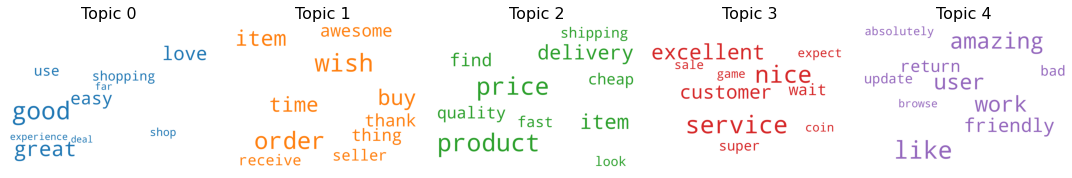

In [46]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(ncols=5, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**Interpretation**

- From the Wordcloud, the following topics can be interpretated:

  - Topic 0: Good Overall Service

  - Topic 1: Good Sellers

  - Topic 2: Good Products
  
  - Topic 3: Good Customer Service
  
  - Topic 4: User Friendly App

## Topic Charting

In [47]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.272070 -0.319770       1        1  36.650524
1      0.035149  0.178556       2        1  27.111921
2      0.173253  0.271353       3        1  16.899888
3     -0.284762 -0.092549       4        1   9.880251
4     -0.195710 -0.037589       5        1   9.457416, topic_info=        Term          Freq         Total Category  logprob  loglift
2       good  13598.000000  13598.000000  Default  30.0000  30.0000
31     great   9721.000000   9721.000000  Default  29.0000  29.0000
38      love   7819.000000   7819.000000  Default  28.0000  28.0000
43      easy   6755.000000   6755.000000  Default  27.0000  27.0000
4    product   3638.000000   3638.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
88      like   1398.584679   2445.610637   Topic5  -2.8199   1.7995
24   payment    167.392721    421.988051   Topic5  -4.9428   1.4337
15    seller    218.545929   1777.509999   Topic5  -4.6761   0.2624
247     well    147.768218    908.727502   Topic5  -5.0675   0.5420
149    buyer    124.161802    679.655599   Topic5  -5.2415   0.6584

[214 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
946       5  0.995866   absolutely
449       5  0.996346     actually
106       3  0.999273   affordable
257       5  0.999606      amazing
290       4  0.997916  application
...     ...       ...          ...
164       2  0.999846         wish
530       2  0.997761    wonderful
381       5  0.999795         work
210       1  0.997975        worth
70        2  0.998999         year

[200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

## Insert Topic Name into Data

In [48]:
df_positive_topic['Dominant_Topic'] = df_positive_topic['Dominant_Topic'].map({0: 'Good Overall Service',
                                                                               1: 'Good Seller',
                                                                               2: 'Good Products',
                                                                               3: 'Good Customer Service',
                                                                               4: 'User Friendly App',
                                                                               })
df_positive_topic['Dominant_Topic'].head()

0             Good Seller
1    Good Overall Service
2             Good Seller
3    Good Overall Service
4           Good Products
Name: Dominant_Topic, dtype: object

# Topic Modeling for below average ratings (1 - 3 ratings )

## Converting to List

In [49]:
data = df[df['rating'] <= 3].clean_content.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['stupid', 'bubble', 'game', 'impossible', 'tap', 'bubble', 'change', 'colour', 'shoot', 'stupid', 'recommend', 'star']]


## LDA Modelling

In [50]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=42,
                                           chunksize = 1000,
                                           passes = 15,
                                           alpha = 'asymmetric')

pprint(lda_model.print_topics())

[(0,
  '0.018*"item" + 0.016*"good" + 0.015*"update" + 0.014*"time" + 0.013*"work" '
  '+ 0.013*"product" + 0.012*"search" + 0.012*"price" + 0.011*"like" + '
  '0.010*"use"'),
 (1,
  '0.043*"service" + 0.042*"customer" + 0.033*"delivery" + 0.027*"bad" + '
  '0.022*"order" + 0.015*"day" + 0.013*"support" + 0.013*"time" + 0.013*"try" '
  '+ 0.013*"issue"'),
 (2,
  '0.052*"account" + 0.022*"card" + 0.021*"listing" + 0.016*"user" + '
  '0.013*"year" + 0.012*"payment" + 0.012*"delete" + 0.012*"use" + '
  '0.012*"review" + 0.011*"credit"'),
 (3,
  '0.026*"talk" + 0.019*"slow" + 0.017*"de" + 0.012*"trash" + 0.011*"unusable" '
  '+ 0.009*"pathetic" + 0.009*"la" + 0.008*"tablet" + 0.008*"base" + '
  '0.007*"di"'),
 (4,
  '0.058*"order" + 0.053*"item" + 0.033*"refund" + 0.030*"seller" + '
  '0.028*"receive" + 0.025*"money" + 0.021*"month" + 0.020*"buy" + '
  '0.018*"product" + 0.017*"time"')]


## Categorizing sorted Data

In [51]:
df_topic_negative_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_negative_topic = df_topic_negative_keywords.reset_index()
df_negative_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_negative_topic['Document_No'] = df[df['rating'] <= 3].index
df_negative_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0           11             0.0              0.9473   
1           40             0.0              0.6794   
2           69             1.0              0.9090   
3          122             2.0              0.5844   
4          139             4.0              0.4503   
5          140             0.0              0.4290   
6          151             0.0              0.9664   
7          174             0.0              0.9041   
8          177             0.0              0.5736   
9          209             4.0              0.7220   

                                            Keywords  \
0  item, good, update, time, work, product, searc...   
1  item, good, update, time, work, product, searc...   
2  service, customer, delivery, bad, order, day, ...   
3  account, card, listing, user, year, payment, d...   
4  order, item, refund, seller, receive, money, m...   
5  item, good, update, time, work, product, searc...   
6  item, good, update, time, work, product, searc...   
7  item, good, update, time, work, product, searc...   
8  item, good, update, time, work, product, searc...   
9  order, item, refund, seller, receive, money, m...   

                                                Text  
0  [stupid, bubble, game, impossible, tap, bubble...  
1  [recent, update, shoppe, bubble, game, unplaya...  
2  [come, contact, live, chat, rep, purposely, wa...  
3  [aware, manage, beat, claim, certain, voucher,...  
4  [delete, account, receive, defective, item, se...  
5  [team, hopeless, usual, send, life, friend, bu...  
6  [hi, hard, shoot, bubble, play, bubble, pron, ...  
7    [force, close, time, hope, improvement, update]  
8                               [dumb, login, issue]  
9  [poor, customer, service, return, policy, sell...

## WordCloud Visualization

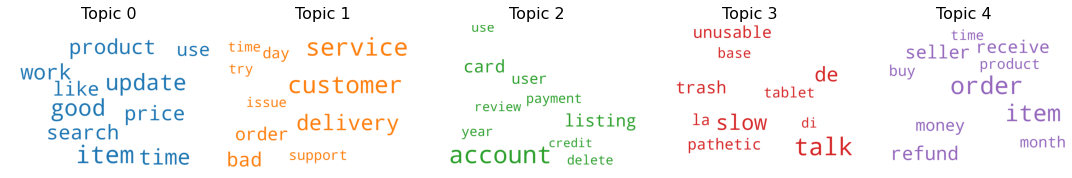

In [52]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(ncols=5, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**Interpretation**

- From the Wordcloud, the following topics can be interpretated:

  - Topic 0: Bad User Experience
    
  - Topic 1: Bad Customer Service

  - Topic 2: Account & Payment Issues
  
  - Topic 3: App Issues

  - Topic 4: Bad Seller Reviews

## Topic Charting

In [53]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.100650  0.048525       1        1  38.730701
4      0.177185 -0.090963       2        1  24.233471
1      0.129630 -0.165707       3        1  20.854237
2     -0.014124  0.302162       4        1  12.385233
3     -0.393341 -0.094018       5        1   3.796359, topic_info=          Term         Freq        Total Category  logprob  loglift
294      order  3191.000000  3191.000000  Default  30.0000  30.0000
86        item  3370.000000  3370.000000  Default  29.0000  29.0000
48     service  1537.000000  1537.000000  Default  28.0000  28.0000
78    customer  1487.000000  1487.000000  Default  27.0000  27.0000
77     account  1157.000000  1157.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
2001      saya    27.266842    27.894273   Topic5  -5.4719   3.2484
3413  warranty    27.962122    28.612242   Topic5  -5.4468   3.2481
261       slow   125.874918   528.867980   Topic5  -3.9423   1.8357
935       suck    47.106601   175.864838   Topic5  -4.9252   1.9538
490    release    36.384367    71.562472   Topic5  -5.1835   2.5947

[288 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
913       2  0.985534  absolutely
77        3  0.045794     account
77        4  0.953894     account
407       1  0.996530          ad
719       1  0.853487         add
...     ...       ...         ...
210       3  0.989207       worst
693       1  0.263797        year
693       3  0.177958        year
693       4  0.556905        year
6809      5  0.980200          假货

[374 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 3, 4])

## Insert Topic Name into Data

In [54]:
df_negative_topic['Dominant_Topic'] = df_negative_topic['Dominant_Topic'].map({0: 'Bad User Experience',
                                                                               1: 'Bad Customer Service',
                                                                               2: 'Account & Payment Issues',
                                                                               3: 'App Issues',
                                                                               4: 'Bad Seller Reviews',
                                                                               })
df_negative_topic['Dominant_Topic'].head()

0         Bad User Experience
1         Bad User Experience
2        Bad Customer Service
3    Account & Payment Issues
4          Bad Seller Reviews
Name: Dominant_Topic, dtype: object

## Combining topic category with df

In [55]:
topics_df = pd.concat([df_positive_topic, df_negative_topic], ignore_index = True).set_index('Document_No').sort_index()

In [56]:
topics_df.shape

(74685, 4)

In [57]:
df['category'] = topics_df['Dominant_Topic']

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74685 entries, 0 to 74684
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   rating          74685 non-null  int64         
 1   date            74685 non-null  datetime64[ns]
 2   app             74685 non-null  object        
 3   store           74685 non-null  object        
 4   review          74685 non-null  object        
 5   clean_content   74685 non-null  object        
 6   adj             60252 non-null  object        
 7   noun            52629 non-null  object        
 8   verb            42763 non-null  object        
 9   emoji           4701 non-null   object        
 10  neg_score       74685 non-null  float64       
 11  neu_score       74685 non-null  float64       
 12  pos_score       74685 non-null  float64       
 13  compound_score  74685 non-null  float64       
 14  month           74685 non-null  int64         
 15  da

# EDA for LDA Topics

## Distribution Across Topics

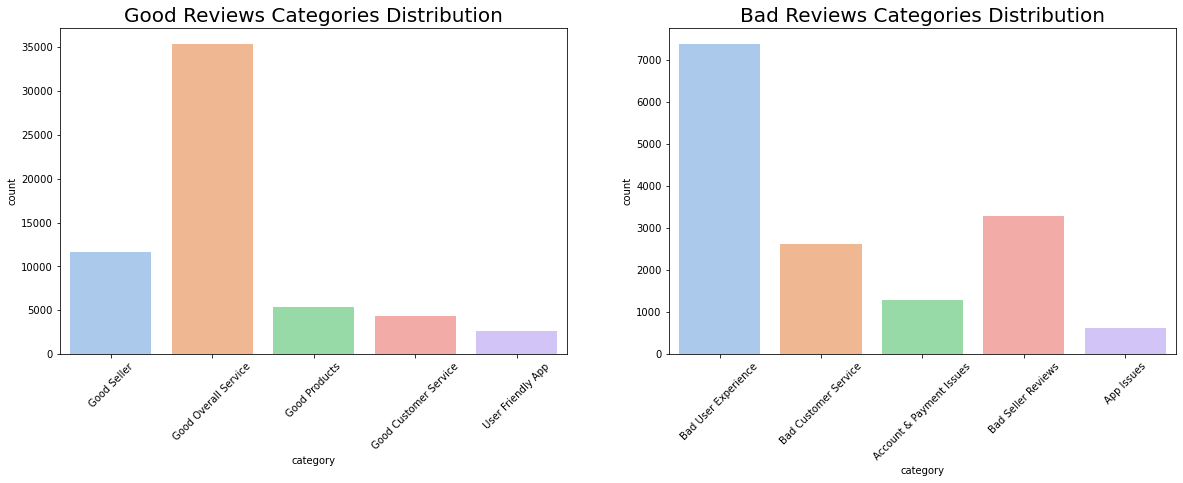

In [59]:
fig, ax = plt.subplots(1,2, figsize = (20, 6))
sns.countplot(x = 'category', data = df[df['rating'] > 3], order = df.category.unique().sort(), ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_title('Good Reviews Categories Distribution', fontsize = 20)
sns.countplot(x = 'category', data = df[df['rating'] <= 3], order = df.category.unique().sort(), ax = ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set_title('Bad Reviews Categories Distribution', fontsize = 20);

**Remarks**
- Most good reviews are about Good Overall Service
- Most bad reviews are about Bad User Experience

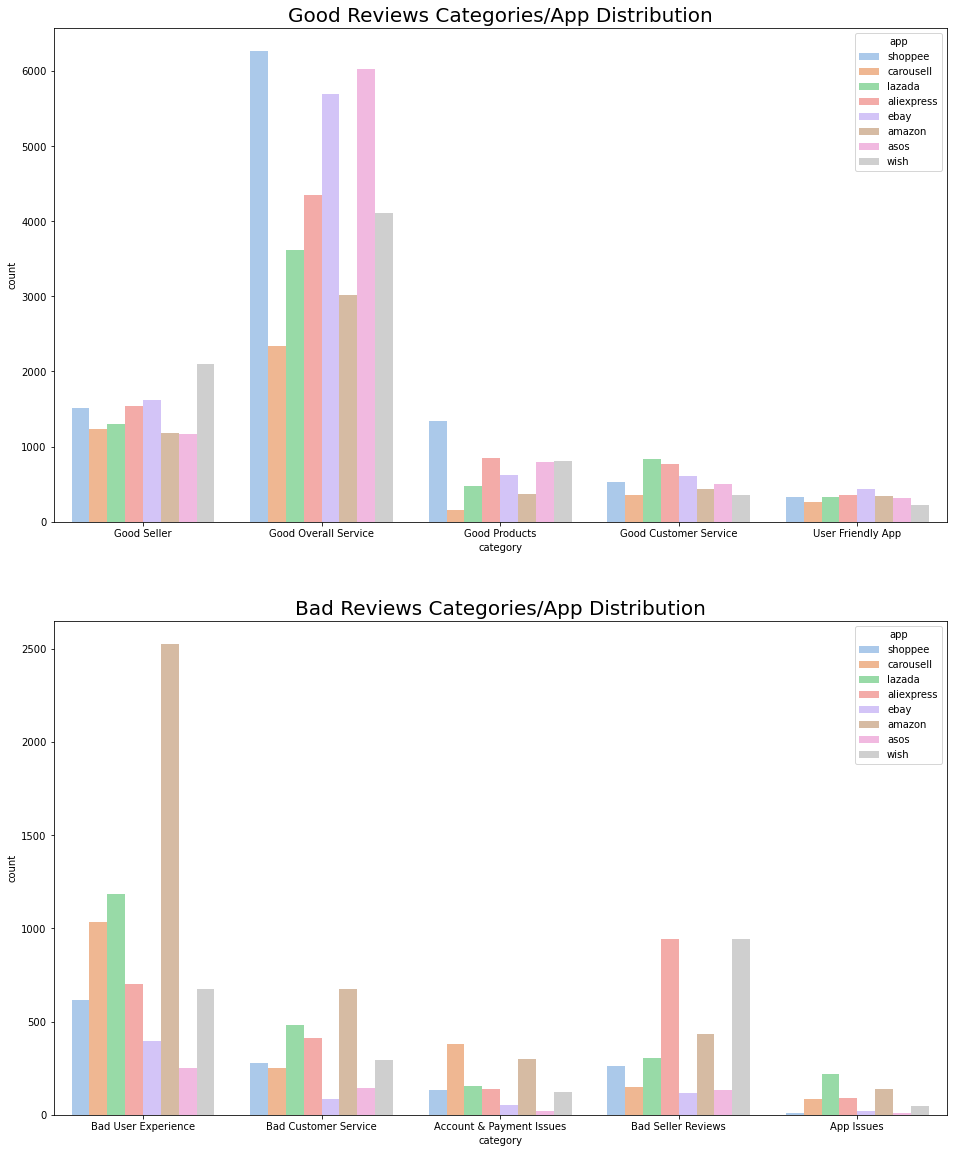

In [60]:
fig, ax = plt.subplots(2,1, figsize = (16, 20))
sns.countplot(x = 'category', hue = 'app', data = df[df['rating'] > 3], order = df.category.unique().sort(), ax = ax[0])
ax[0].set_title('Good Reviews Categories/App Distribution', fontsize = 20)

sns.countplot(x = 'category', hue = 'app', data = df[df['rating'] <= 3], order = df.category.unique().sort(), ax = ax[1])
ax[1].set_title('Bad Reviews Categories/App Distribution', fontsize = 20);

**Remarks**
- Amazon seems to take the lead in having more bad reviews as compared to the other apps
- AliExpress and Wish and higher bad seller reviews. 
- Shoppee and ASOS takes the lead in Good Overall Service for good reviews

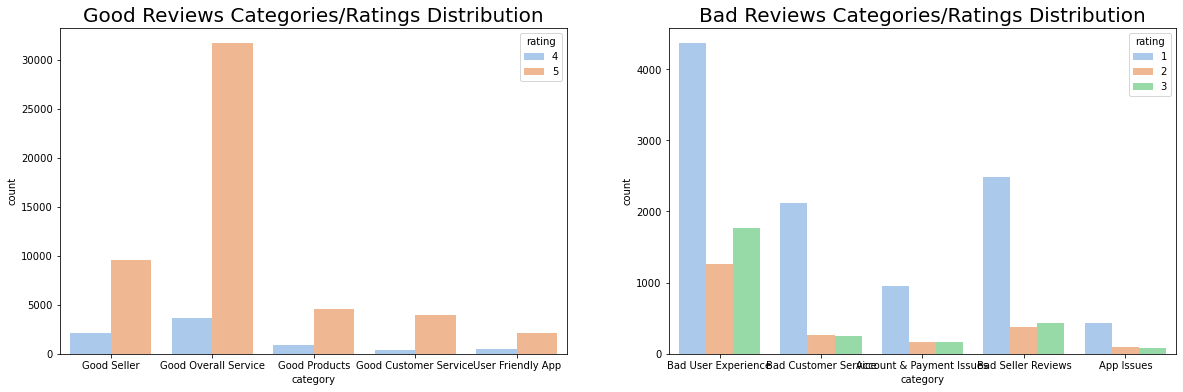

In [61]:
fig, ax = plt.subplots(1,2, figsize = (20, 6))
sns.countplot(x = 'category', hue = 'rating', data = df[df['rating'] > 3], order = df.category.unique().sort(), ax = ax[0])
ax[0].set_title('Good Reviews Categories/Ratings Distribution', fontsize = 20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.countplot(x = 'category', hue = 'rating', data = df[df['rating'] <= 3], order = df.category.unique().sort(), ax = ax[1])
ax[1].set_title('Bad Reviews Categories/Ratings Distribution', fontsize = 20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45);

**Remarks**
- Users the wants to give a bad review will tend to just give a 1 rating
- Users that wants to give a good review will tend to just give a 5 rating

## Distribution of Rating for Month and Week

In [62]:
def plot_countplots_time_cat(df, date_features, scoring):
    nrows = int(np.ceil(len(date_features)))
    fig,ax = plt.subplots(nrows,1, figsize = (15, 6*nrows))
    
    for i in range(len(date_features)):
        ax[i].set_title(f'Count of {date_features[i]} across Shopping reviews {scoring}', fontdict = {'fontsize': 20})
        g = sns.countplot(x = date_features[i] , data = df, ax=ax[i], color = 'grey')
        g2 = g.twinx()
        
        g2 = sns.pointplot(x = date_features[i],
                           y = scoring,
                           hue = 'category',
                           data = df,
                           errwidth = 0,
                           ax=g2)
        
        plt.legend()
    plt.show()

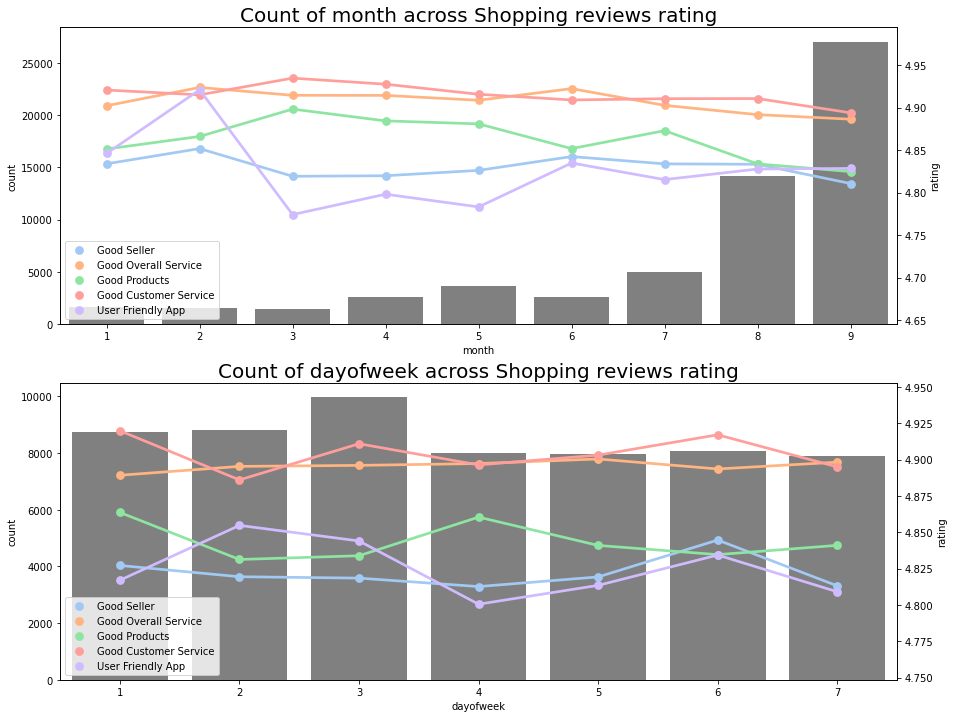

In [63]:
plot_countplots_time_cat(df[df['rating'] >3] , ['month', 'dayofweek'], 'rating')

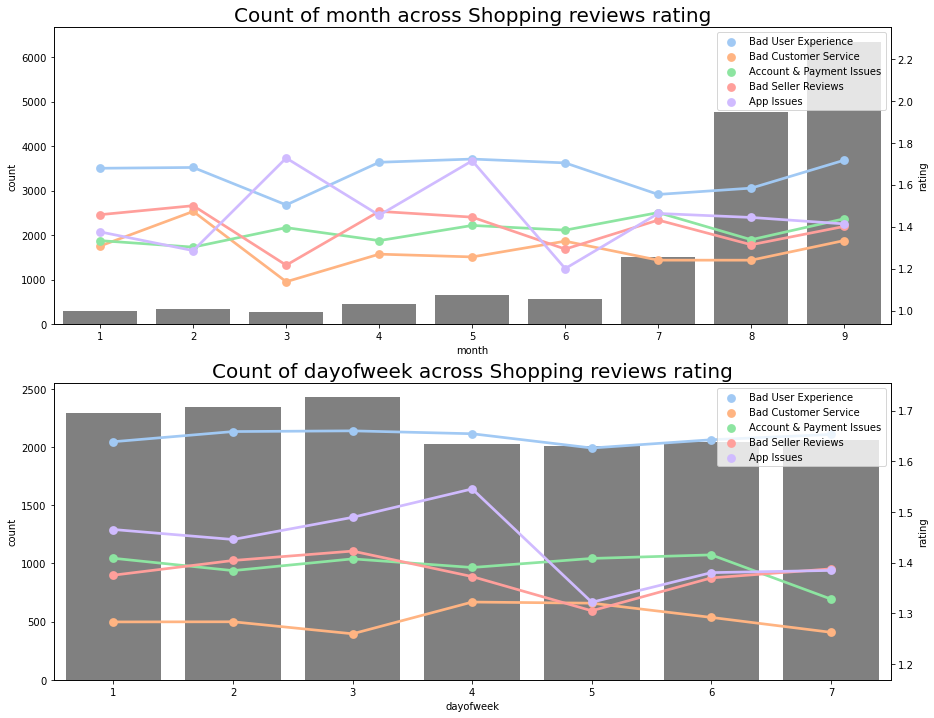

In [64]:
plot_countplots_time_cat(df[df['rating'] <= 3] , ['month', 'dayofweek'], 'rating')

## Distribution of Compound Score for Month and Week

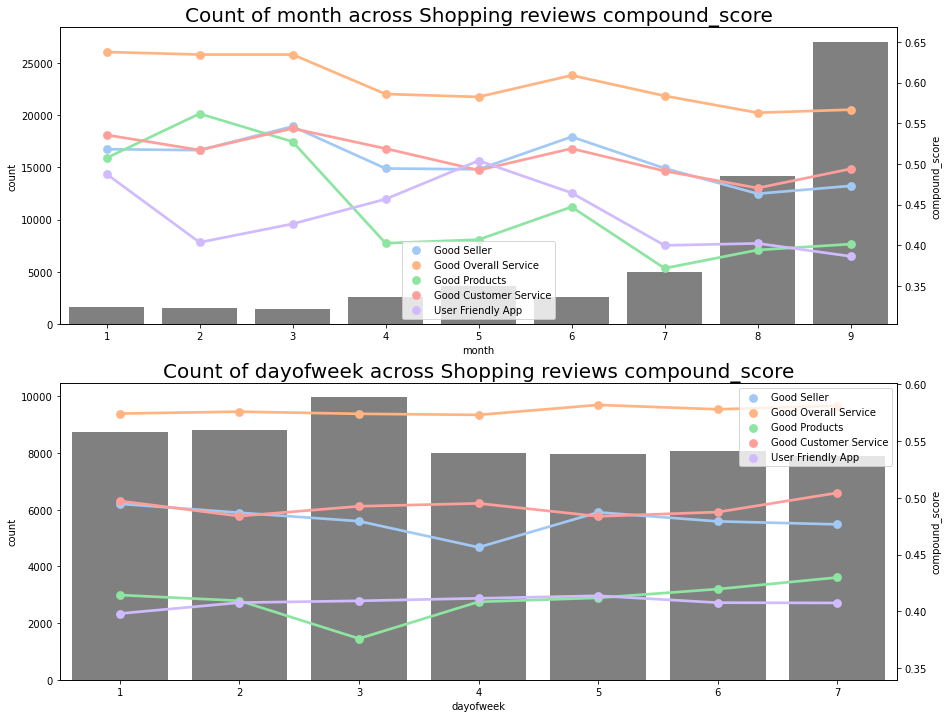

In [65]:
plot_countplots_time_cat(df[df['rating'] > 3] , ['month', 'dayofweek'], 'compound_score')

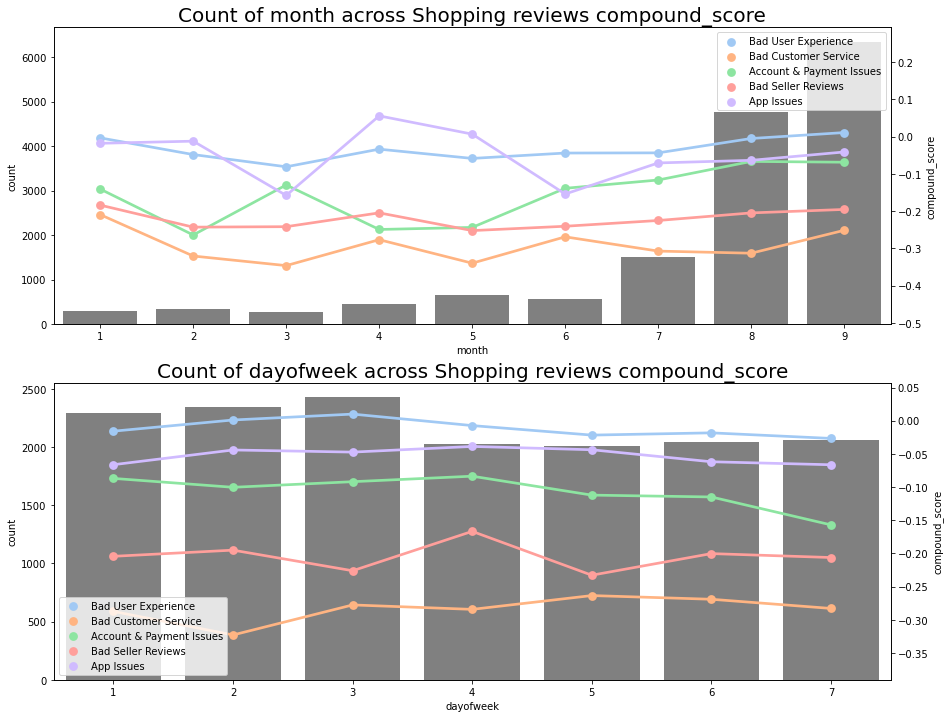

In [66]:
plot_countplots_time_cat(df[df['rating'] <= 3] , ['month', 'dayofweek'], 'compound_score')

**Remarks**
- There is a dip in march for rating for Bad Seller reviews and Bad Customer service. 
- This could be due to sellers unable fulfill orders as everyone was ordering online during the Covid-19 outbreak.
- There is a dip on Fridays for app issues


# Exporting Data for Modelling

In [67]:
df.to_csv('../data/reviews_Model.csv', index=None, header=True)